### Exploratory Data Analysis For All Project Data

In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [10]:
cleaned_lines_df = pd.read_csv('C:\\MSAAI\\AAI-520\\Generative_ChatBot_Final\\clean_dataset\\cleaned_movie_lines.csv')

In [11]:
# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Clean the text and remove stopwords
words = " ".join(cleaned_lines_df['line_text']).split()
filtered_words = [word for word in words if word.lower() not in stop_words]

In [13]:
cloud_text = " ".join(filtered_words)
# cloud_text = " ".join(line for line in cleaned_lines_df['line_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=200).generate(cloud_text)

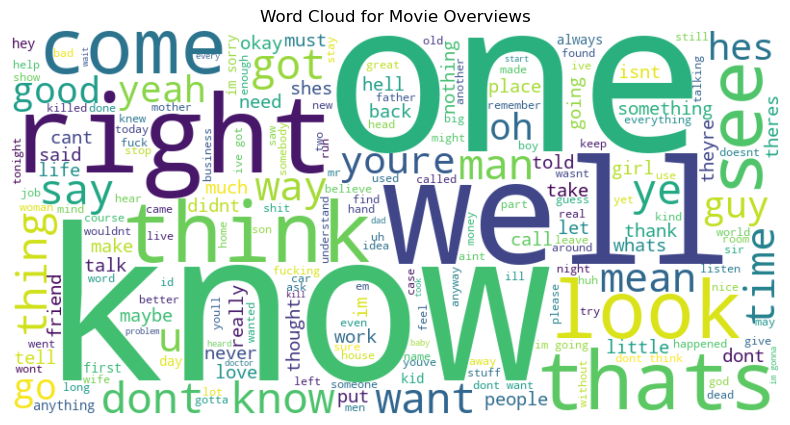

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Overviews')
plt.show()

In [20]:
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

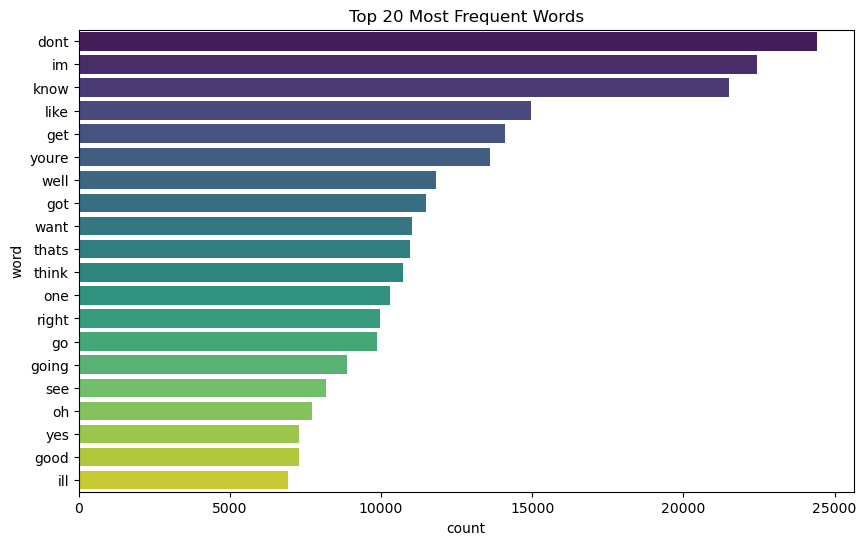

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=word_df, palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.show()

An observation made while comparing the results of the word cloud and the barplot, is that the top words in both cases don't all match as expected. Why is that? 



In [7]:
cleaned_lines_df['text_length'] = cleaned_lines_df['line_text'].apply(lambda x: len(x.split()))

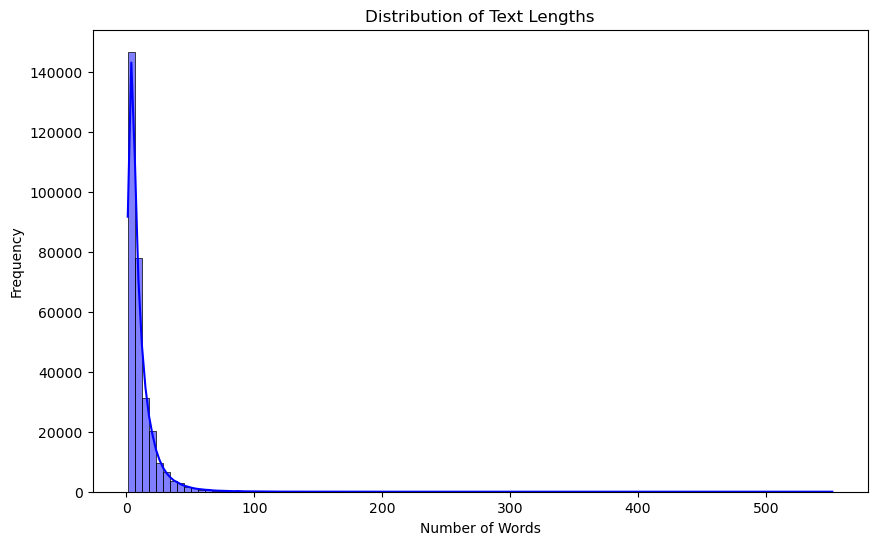

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_lines_df['text_length'], bins=100, kde=True, color='blue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()